In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vivekchaurasia69","key":"663aeba89e7765c3cbfde4a9d04cd3ef"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c LANL-Earthquake-Prediction

100% 2.27G/2.27G [00:59<00:00, 91.1MB/s]
100% 2.27G/2.27G [00:59<00:00, 41.1MB/s]


In [4]:
!unzip /content/LANL-Earthquake-Prediction.zip

##Loading the dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_error

In [2]:
#df = pd.read_csv("train.csv",nrows = 80000000)
df =  pd.read_csv("train.csv")
df.head(2)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691


In [7]:
df.shape

(629145480, 2)

In [ ]:
df.isnull().sum()

acoustic_data      0
time_to_failure    0
dtype: int64

No null or NaN value found in acoustic_data column and time_to_failure


PDF of acoustic_data and time_to_failure

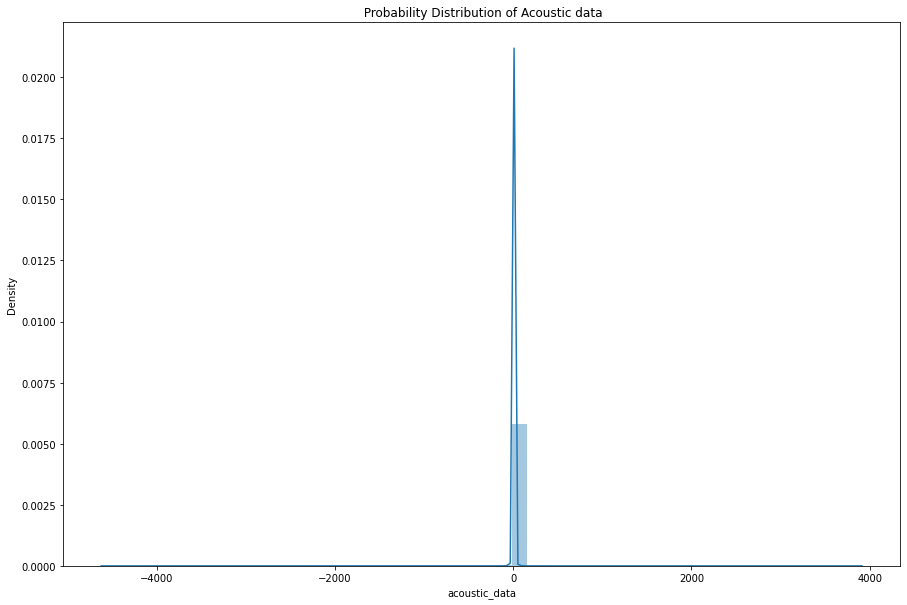

In [ ]:
plt.figure(figsize=(15,10))
plt.title(" Probability Distribution of Acoustic data")
sns.distplot(df["acoustic_data"])

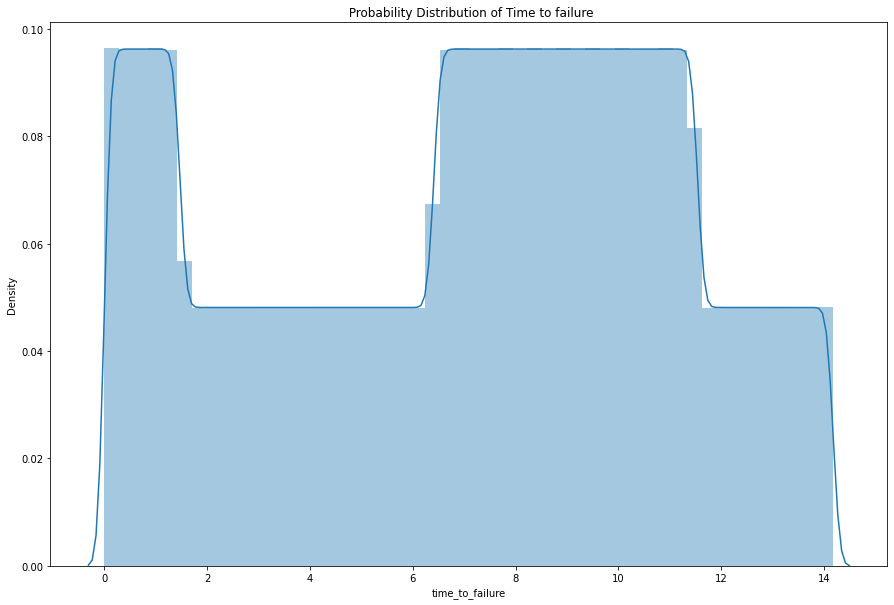

In [ ]:
plt.figure(figsize=(15,10))
plt.title(" Probability Distribution of Time to failure")
sns.distplot(df["time_to_failure"])

###Percentiles

In [8]:
print("Minimum value of acoustic data is : " , min(df["acoustic_data"]))

Minimum value of acoustic data is :  -5515


In [9]:
print("Maximum value of acoustic data is : " , max(df["acoustic_data"]))

Maximum value of acoustic data is :  5444


In [10]:
print("Average value of acoustic data is : " , df["acoustic_data"].mean())

Average value of acoustic data is :  4.519467573700124


In [11]:
print("Variance of acoustic data is : " , df["acoustic_data"].var())

Variance of acoustic data is :  115.25541014720227


In [12]:
print("Standard deviation of acoustic data is : " , df["acoustic_data"].std())

Standard deviation of acoustic data is :  10.735707249510964


##Finding outliers

In [13]:
for i in range(0 , 105 , 5):
  print(i , "th percentile value is" , df["acoustic_data"].quantile(i/100))

0 th percentile value is -5515.0
5 th percentile value is -2.0
10 th percentile value is 0.0
15 th percentile value is 1.0
20 th percentile value is 2.0
25 th percentile value is 2.0
30 th percentile value is 3.0
35 th percentile value is 3.0
40 th percentile value is 4.0
45 th percentile value is 4.0
50 th percentile value is 5.0
55 th percentile value is 5.0
60 th percentile value is 5.0
65 th percentile value is 6.0
70 th percentile value is 6.0
75 th percentile value is 7.0
80 th percentile value is 7.0
85 th percentile value is 8.0
90 th percentile value is 9.0
95 th percentile value is 11.0
100 th percentile value is 5444.0


In [14]:
for i in range(90 , 101):
  print(i , "th percentile value is" , df["acoustic_data"].quantile(i/100))

90 th percentile value is 9.0
91 th percentile value is 9.0
92 th percentile value is 10.0
93 th percentile value is 10.0
94 th percentile value is 11.0
95 th percentile value is 11.0
96 th percentile value is 12.0
97 th percentile value is 13.0
98 th percentile value is 15.0
99 th percentile value is 20.0
100 th percentile value is 5444.0


In [15]:
#https://www.edureka.co/community/47748/is-there-a-way-to-loop-between-0-and-1-by-0-1-in-python
a = np.linspace(99,100,11)
for i in a:
  print(i , "th percentile value is" , df["acoustic_data"].quantile(i/100))

99.0 th percentile value is 20.0
99.1 th percentile value is 21.0
99.2 th percentile value is 22.0
99.3 th percentile value is 24.0
99.4 th percentile value is 25.0
99.5 th percentile value is 28.0
99.6 th percentile value is 31.0
99.7 th percentile value is 35.0
99.8 th percentile value is 42.0
99.9 th percentile value is 56.0
100.0 th percentile value is 5444.0


In [4]:
a = np.linspace(0,3 , 20)
for i in a:
  print(round(i, 2) , "th percentile value is" , df["acoustic_data"].quantile(i/100))

0.0 th percentile value is -5515.0
0.16 th percentile value is -37.0
0.32 th percentile value is -25.0
0.47 th percentile value is -19.0
0.63 th percentile value is -16.0
0.79 th percentile value is -13.0
0.95 th percentile value is -11.0
1.11 th percentile value is -10.0
1.26 th percentile value is -9.0
1.42 th percentile value is -8.0
1.58 th percentile value is -7.0
1.74 th percentile value is -7.0
1.89 th percentile value is -6.0
2.05 th percentile value is -6.0
2.21 th percentile value is -5.0
2.37 th percentile value is -5.0
2.53 th percentile value is -5.0
2.68 th percentile value is -4.0
2.84 th percentile value is -4.0
3.0 th percentile value is -4.0


Removing outliers

In [ ]:
dataframe = df[(df["acoustic_data"] >-2.0) & (df["acoustic_data"]<41.0)]

In [ ]:
dataframe.head(3)

In [ ]:
dataframe.shape

(75419585, 2)

#Adding features

In [ ]:
def feat(x):
    features = {}
    features['Mean'] = x.mean()
    features['Std'] = x.std()
    features['max value'] = x.max()
    features['min value'] = x.min()
    features['kurtosis']  = x.kurtosis()
    features['skew'] = x.skew()

    return features


In [ ]:
from tqdm import tqdm
rows = 150000
feature = []
y = []
for i in tqdm(range(int(np.floor(dataframe.shape[0] / rows)))):
    
    x = dataframe.iloc[i*rows :i*rows + rows]
    y.append(x.time_to_failure.values[-1])
    
    feature.append(feat(x["acoustic_data"]))
feat = pd.DataFrame(feature)

In [ ]:
feat.head(2)

In [ ]:
feat['time_to_failure'] = y

In [ ]:
feat.head()

,Mean,Std,max value,min value,kurtosis,skew,time_to_failure
0,5.439073,3.811995,40,-1,7.402524,1.614704,1.428697
1,5.441407,4.099468,40,-1,9.412674,2.000150,1.386100
2,5.754020,4.411222,40,-1,9.459090,2.123984,1.344698
3,5.522100,3.981573,40,-1,9.008754,1.883339,1.303198
4,5.636153,4.162226,40,-1,9.996978,2.074935,1.261698


In [ ]:
x = feat.iloc[ :  , : -1]
y = feat.iloc[:  , -1 ]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.10)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train )

In [ ]:
x_test = scaler.transform(x_test)

KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_neighbors = list(range(1,30 , 2))

hyperparameters = dict(n_neighbors = n_neighbors)

knn_2 = KNeighborsRegressor()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10 , scoring='neg_mean_absolute_error')

best_model = clf.fit(x_train,y_train)

print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
clf = KNeighborsRegressor(n_neighbors = 7)
clf.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)

In [ ]:
print(mean_absolute_error(y_train, pred_train))
mean_absolute_error(y_test, pred_test)

1.6513597391227208


2.32267305969109

Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg  = RandomForestRegressor()
params = { 'n_estimators': [10,50,200,500,1000], 'max_depth': [5,10,20,100,50] } 
clf = RandomizedSearchCV(reg, params, scoring='neg_mean_absolute_error') 

clf.fit(x_train, y_train)
print(clf.best_params_)

In [ ]:
clf = RandomForestRegressor(max_depth = 5 ,n_estimators = 200 )
clf.fit(x_train , y_train) 

RandomForestRegressor(max_depth=5, n_estimators=200)

In [ ]:
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)

In [ ]:
print(mean_absolute_error(y_train, pred_train))
mean_absolute_error(y_test, pred_test)

1.416137439496546


2.2533819233703163

Random forest is better than KNN